-----

# Analísis de viajes en Taxi en la ciudad de Chicago

## Introducción

El propósito de este notebook será complementar la exploración de los datos de los registros de viajes en taxi en la ciudad de Chicago en Noviembre de 2017, aquí se estudiarán los datos de los viajes realizados por cada compañía en la ciudad, los barrios en los que terminó cada viaje y el promedio de cada uno.

Se mostrarán los barrios con más viajes concluidos en ellos y las compañías de taxis las cuales fueron las más solicitadas en dicho mes, para los cuales se crearán gráficos de barras para mostrar los datos de cada categoría ya que estos permitirán ver los números de cada elemento en ambos DF de manera clara y fácil de comprender y estudiar.

Además, se buscará comprobar la hipotesis de que "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos", utilizando un tercer DataFrame con los datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare, la cual requerirá una prueba T de dos grupos o muestras (viajes en clima 'Bueno' y los viajes con un clima lluvioso o 'malo').


## Inicialización

In [18]:
# Cargaremos todas las librerías que puedan ser útiles
import pandas as pd # pandas para crear los DF
from scipy import stats as st # stats para crear las pruebas de estadística
import numpy as np # numpy para las operaciones matemáticas
from matplotlib import pyplot as plt # pyplot para poder crear distintos gráficos
import seaborn as sns

In [19]:
trips_df = pd.read_csv('../moved_project_sql_result_01.csv') # creamos el dataframe de los viajes y las compañías
neighborhoods_df = pd.read_csv('../moved_project_sql_result_04.csv') # creamos el dataframe de los barrios y los promedios de viajes
ttest_trips_df = pd.read_csv('../moved_project_sql_result_07.csv') # DF para las pruebas de hipótesis

In [20]:
print(trips_df.head())
print('')
trips_df.info()

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


En el DataFrame de los viajes se puede observar los nombres de cada compañía de taxis, así como sus viajes en total, la información del DF revela que no existen valores ausentes y que los tipos de datos(object para 'company_name' y entero para 'trips_amount') son los indicados para su análisis.

In [21]:
print(neighborhoods_df.head())
print('')
neighborhoods_df.info()

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


En el DataFrame de los barrios de la ciudad se puede observar los nombres de cada vecindario, también como sus viajes en promedio, la información del DF revela que no existen valores ausentes y que los tipos de datos(object para 'dropoff_location_name' y flotante para 'average_trips') son los indicados para su análisis.

In [22]:
print(ttest_trips_df.head())
print('')
ttest_trips_df.info()

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


En el DataFrame de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare se nos muestra las fechas y hora de cada viaje, también sus duraciones y las condiciones climáticas en ese momento; la información del DF revela que no existen valores ausentes y que unicamente la fecha podría necesitar cambiar a un tipo de datos para fecha como por ejemplo con el método todatetime si se requiere durante su análisis, fuera de esto los demas tipos de datos en las columnas serían los correctos.

## Análisis exploratorio de datos

In [23]:
# Encontraremos los 10 barrios con más viajes concluidos en ellos
# ordenamos los barrios por promedio de viajes en caso de que algún dato no esté ya ordenando en el DF
top_neiborhoods = neighborhoods_df.sort_values(by='average_trips', ascending=False)
# guardamos los 10 principales en una variable y la mostramos
top_10_neiborhoods = top_neiborhoods.head(10)
print(top_10_neiborhoods)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


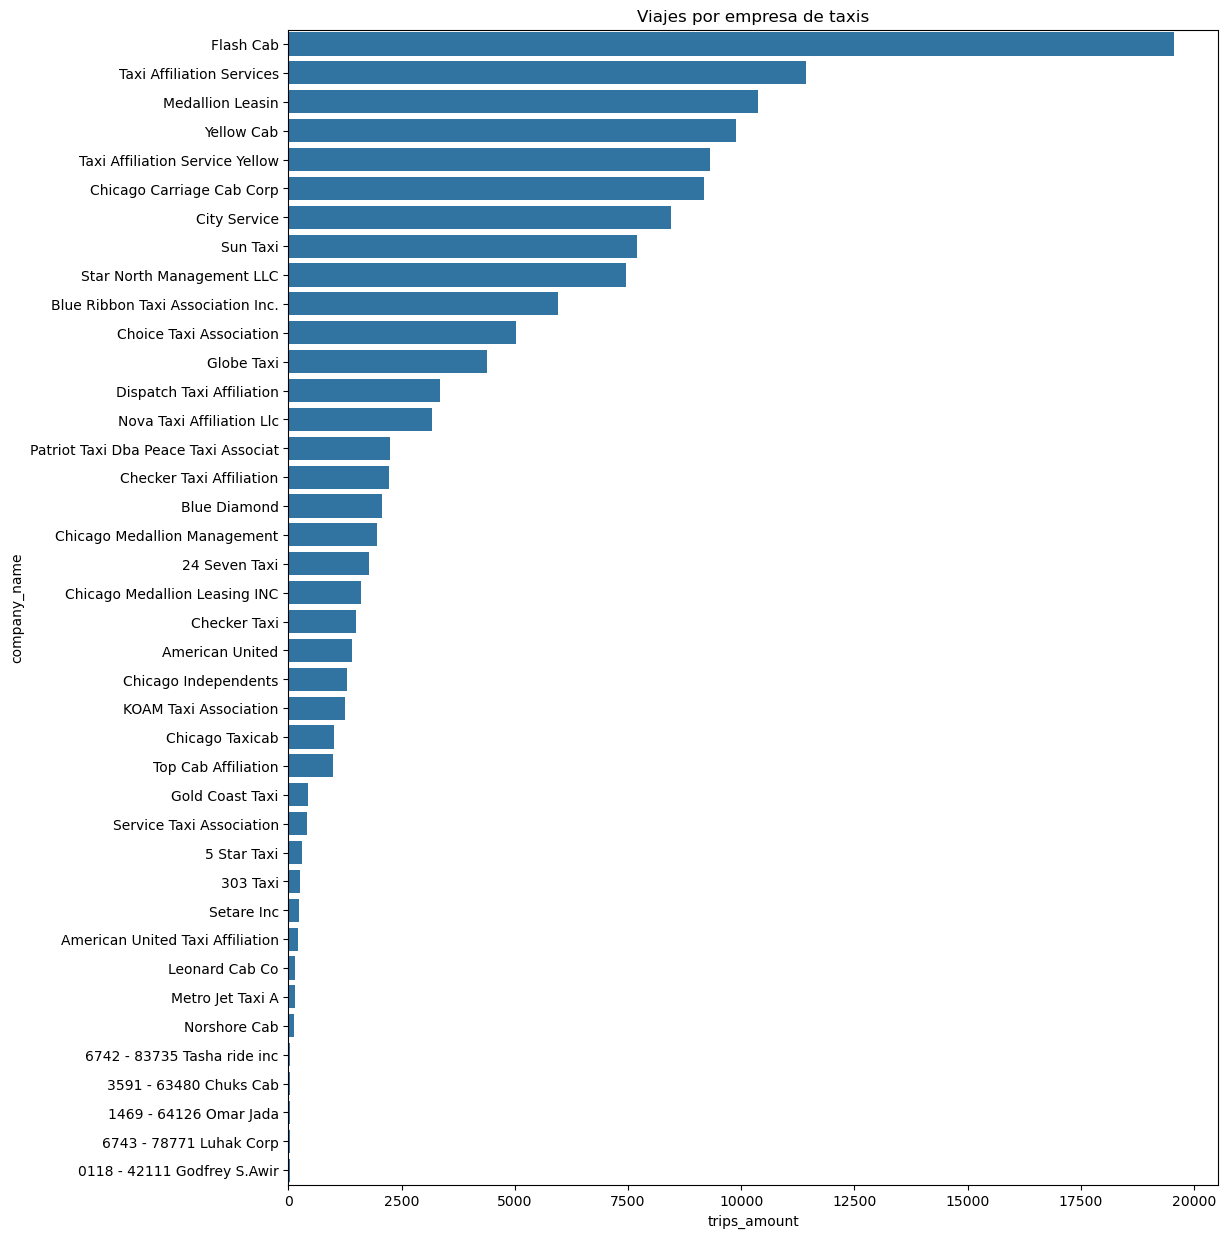

In [24]:
# Creamos el gráfico para las empresas de taxis y sus viajes en total

plt.figure(figsize=(12, 15))
sns.barplot(data=trips_df.head(40), x='trips_amount', y='company_name', orient='h')
plt.title('Viajes por empresa de taxis')
plt.show()

Con el gráfico de las empresas de taxis podemos observar un claro dominio por así decirlo de la empresa número 1 'Flash Cab', mostrando una diferencia de casi el doble de viajes en total contra incluso la segunda empresa en la lista, donde también las primeras 6 lograron superar los 9000 viajes en los días estudiados.

Como otro punto aparte, se puede notar que en la ciudad existe una gran demanda de viajes en taxi con un total de casi 150,000 viajes registrados para estas fechas, donde 'Flash Cab' es la opción preferida y después de esta existe un duelo algo más parejo entre las siguientes 8 empresas de taxis(hasta 'Star North'), y la brecha empieza a crecer un poco más con las demás compañías.

El gráfico se decidió crear con solo las primeras 40 empresas para no sobrecargar de información la imagen resultante y ya que al mostrar todas las empresas en un principio, muchas de estas se perdían, además de que al tener muy pocos viajes en comparación con las primeras no se podían apreciar realmente en el gráfico sus cantidades.

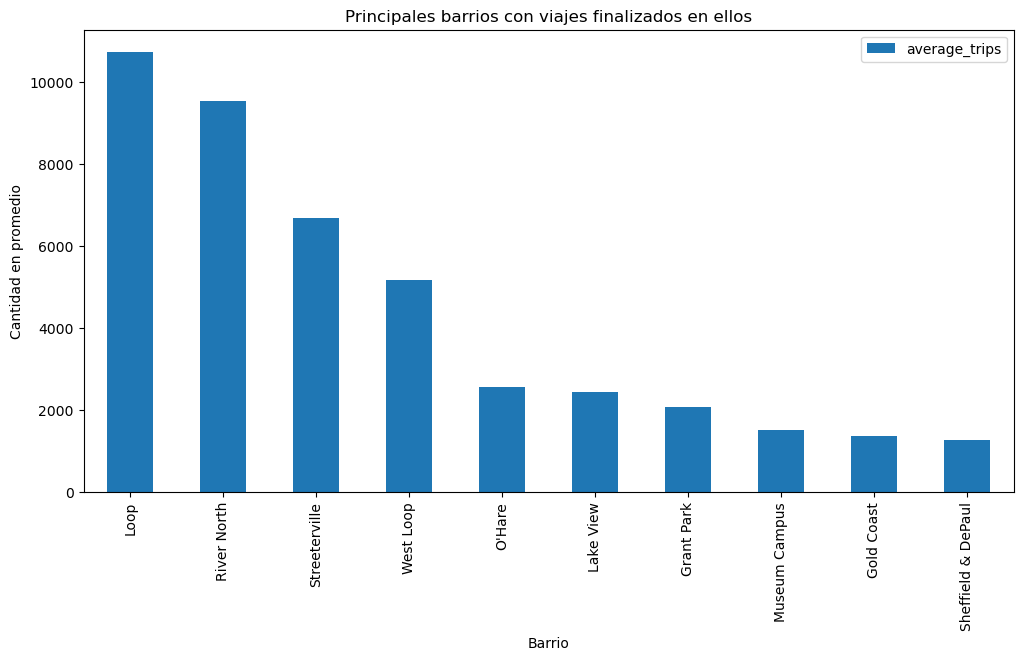

In [25]:
# GRáfico para los 10 principales barrios por número de finalizaciones
top_10_neiborhoods.plot(kind='bar', 
                        title='Principales barrios con viajes finalizados en ellos',
                        xlabel='Barrio',
                        x='dropoff_location_name',
                        ylabel='Cantidad en promedio',
                        figsize=(12, 6))
plt.show()

Viendo los resultados del gráfico de los barrios con más viajes realizados se puede notar una clara diferencia de los primeros 4 vecindarios(Loop, River North, Streeterville y West Loop en ese ordén) con los 6 restantes, donde Loop superó los 10000 viajes concluidos en él y River North se acercó bastante a esa cantidad.

También se pudo observar que por ejemplo, los viajes concluidos en Loop son casi 5 veces los finalizados en O'Hare, siendo este último la 5ta de los 10 con más viajes, esto indica que mucha gente suele dirigirse a este barrio junto con River North, para los cuales podría convenir obtener más información sobre las posibles razones de esto y que las empresas de taxis pudieran sacar mayor provecho de esta tendencia.

## Prueba de hipótesis

In [26]:
#Buscamos los valores distintos en las condiciones climaticas
print(ttest_trips_df['weather_conditions'].unique())

['Good' 'Bad']


In [27]:
# Filtramos los viajes por condición climática y los separamos

good_weather_trips = ttest_trips_df[ttest_trips_df['weather_conditions'] == 'Good'].copy() #viajes con buen clima
bad_weather_trips = ttest_trips_df[ttest_trips_df['weather_conditions'] == 'Bad'].copy() #viajes con clima lluvioso


print(f"Viajes realizados con buen clima: {len(good_weather_trips)}")
print(f"Viajes realizados con mal clima: {len(bad_weather_trips)}")

Viajes realizados con buen clima: 888
Viajes realizados con mal clima: 180


In [28]:
#Calculamos los promedios de los viajes y las varianzas de cada DF
good_weather_trips_mean = good_weather_trips['duration_seconds'].mean()  # media y varianza de climas buenos
good_weather_trips_variance = np.var(good_weather_trips['duration_seconds'])

bad_weather_trips_mean = bad_weather_trips['duration_seconds'].mean()  # media y varianza de  climas lluviosos
bad_weather_trips_variance = np.var(bad_weather_trips['duration_seconds'])

print('Promedio de viajes realizados con buen clima:', good_weather_trips_mean)
print('Varianza de viajes realizados con buen clima:', good_weather_trips_variance)
print('')
print('Promedio de viajes realizados con mal clima:', bad_weather_trips_mean)
print('Varianza de viajes realizados con mal clima:', bad_weather_trips_variance)

Promedio de viajes realizados con buen clima: 1999.6756756756756
Varianza de viajes realizados con buen clima: 575732.9308497686

Promedio de viajes realizados con mal clima: 2427.2055555555557
Varianza de viajes realizados con mal clima: 517403.5633024689


In [29]:
#Verificamos si las vaianzas son realmente iguales o no con levene()
from scipy.stats import levene

# Función para hacer la prueba de Levene:
def test_variance_equality(group1, group2, alpha=0.01):
    """
    Prueba de Levene para verificar homogeneidad de varianzas
    H0: Las varianzas son iguales
    H1: Las varianzas son diferentes
    """
    levene_stat, levene_p = levene(group1, group2)
    
    print("=== PRUEBA DE LEVENE (Homogeneidad de Varianzas) ===")
    print(f"Estadístico de Levene: {levene_stat:.4f}")
    print(f"Valor p: {levene_p:.6f}")
    
    if levene_p < alpha:
        print("Rechazamos la hipótesis nula,: Las varianzas NO son iguales")
        return False  # usar equal_var=False
    else:
        print("No podemos rechazar la hipótesis nula: Las varianzas son iguales")
        return True   # usar equal_var=True

In [30]:
# Probamos las hipótesis alternativa 'la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos'

good_weather_trips_durations = good_weather_trips['duration_seconds'] #asignamos las duraciones de viajes con buen clima
bad_weather_trips_durations = bad_weather_trips['duration_seconds'] #asignamos las duraciones de viajes con mal clima

# Usamos la función:
platforms_equal_variances = test_variance_equality(good_weather_trips_durations, bad_weather_trips_durations)

# asignamos el valor alfa a 0.01 ya que el resultado puede ser muy significativo para comparar tarifas y otras informaciones en los viajes determinadas por el clima
alpha = 0.01 

print(f"\n=== T-TEST con 'equal_var={platforms_equal_variances}'' ===")
results = st.ttest_ind(good_weather_trips_durations, bad_weather_trips_durations, equal_var=platforms_equal_variances) # realizamos una prueba para las 2 climas

print(f'Valor p del t-test: {results.pvalue}')

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula, la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos")
else:
    print("No podemos rechazar la hipótesis nula, la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es similas entre los sábados lluviosos y los soleados")

=== PRUEBA DE LEVENE (Homogeneidad de Varianzas) ===
Estadístico de Levene: 0.3885
Valor p: 0.533204
No podemos rechazar la hipótesis nula: Las varianzas son iguales

=== T-TEST con 'equal_var=True'' ===
Valor p del t-test: 6.517970327099473e-12
Rechazamos la hipótesis nula, la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos


# Conclusiones

Para la prueba la hipótesis nula quedó establecida como "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es similas entre los sábados lluviosos y los soleados", ya que se buscaba averiguar si el promedio de los viajes realizados los sábados lluviosos cambiaba con respecto a los de buen clima, y normalmente las hipótesis que buscan ver una similitud tienden a ser la nula, donde se estableció como hipótesis alternativa para la prueba la planteada por el proyecto: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Se optó por una prueba T de dos muestras independientes ya que compararíamos un promedio de viajes en sábados con buen clima contra otro con los climas lluviosos(donde sus varianzas se veriricaron como iguales), así como que fuera de dos colas ya que solo se buscaba comprobar que los promedios fueran distintos, no si uno era mayor o menor que el otro específicamente. 

Como resultado de las prueba de hipótesis de los viajes entre sábados con buen clima y los de clima lluvioso se logró comprobar que la duración promedio cambia los sábados lluviosos al mostrar un valor p bastante bajo. 